# Python Group Assignment

- Fajar Tri ANGGORO
- Harikrishnan GOPALAKRISHNAN
- Tristan HELLE

## General Workflow
### 1) Identifying Business Problem
### 2) Data Cleaning and Preparation
### 3) Exploratory Data Analysis (EDA)

### 1) Identifying Business Problem

In this case, we're asked to create a base table. This base table could then be used to create a Machine Learning Model and analysed to gain insight.

We will gather the available data and combine them into a single table, the granularity of this table is a client who is an account owner. Once the base table ready, we will also do some Exploratory Data Analysis on the table. A Machine learning model will not be developed since the scope of the work only covers data preparation and analysis.

In [2]:
# Import Packages Required

import pandas as pd

### 2) Data Cleaning and Preparation

In this step, we're going to create a base table which contains information from different tables. The granularity of this table is a client who is an account owner, and there will be 2 target variables 

In [3]:
# Import banking data
# Note: This data was extracted on 1999

# Each record describes characteristics of a client
client = pd.read_csv('../data/raw/data_berka/client.asc', sep=';')

# Each record describes static characteristics of an account
account = pd.read_csv('../data/raw/data_berka/account.asc', sep=';')

# Each record describes a credit card issued to an account
card = pd.read_csv('../data/raw/data_berka/card.asc', sep=';')

# Each record describes demographic characteristics of a district
district = pd.read_csv('../data/raw/data_berka/district.asc', sep=';')

# Each record relates together a client with an account
# i.e. this relation describes the rights of clients to operate accounts
disp = pd.read_csv('../data/raw/data_berka/disp.asc', sep=';')

# Each record describes characteristics of a payment order (debits only)
order = pd.read_csv('../data/raw/data_berka/order.asc', sep=';')

# Each record describes one transaction on an account
trans = pd.read_csv('../data/raw/data_berka/trans.asc', sep=';', low_memory=False)


# Each record describes a loan granted for a given account
loan = pd.read_csv('../data/raw/data_berka/loan.asc', sep=';')

### Account table

We will start with the account table to filter some information

In [4]:
# Take a look at the data
account.info()

account.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   account_id   4500 non-null   int64 
 1   district_id  4500 non-null   int64 
 2   frequency    4500 non-null   object
 3   date         4500 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 140.8+ KB


,account_id,district_id,frequency,date
0,576,55,POPLATEK MESICNE,930101
1,3818,74,POPLATEK MESICNE,930101
2,704,55,POPLATEK MESICNE,930101
3,2378,16,POPLATEK MESICNE,930101
4,2632,24,POPLATEK MESICNE,930102


The independent Variable timeframe has been set to 1996, so we will only consider accounts that has been created BEFORE 1996 (accounts that were created in 1996 does not need to be included because it wont have sufficient data in 1996)

In [5]:
# Create column year
account['year'] = account['date'].astype(str).str[:2].astype(int) + 1900
base = account[account['year'] < 1996].copy(deep=True)

# Check if all the year is < 1996
base['year'].unique()

array([1993, 1994, 1995])

In [6]:
# Add length of relationship in year

base['lor'] = 1996 - base['year']
base.head()

,account_id,district_id,frequency,date,year,lor
0,576,55,POPLATEK MESICNE,930101,1993,3
1,3818,74,POPLATEK MESICNE,930101,1993,3
2,704,55,POPLATEK MESICNE,930101,1993,3
3,2378,16,POPLATEK MESICNE,930101,1993,3
4,2632,24,POPLATEK MESICNE,930102,1993,3


### Disp Table & Client Table 

Merge current table with the client table, but only consider the account owners. But first, we need to merge with the disp table

In [7]:
# Take a look at the data
disp.info()

disp.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   disp_id     5369 non-null   int64 
 1   client_id   5369 non-null   int64 
 2   account_id  5369 non-null   int64 
 3   type        5369 non-null   object
dtypes: int64(3), object(1)
memory usage: 167.9+ KB


,disp_id,client_id,account_id,type
0,1,1,1,OWNER
1,2,2,2,OWNER
2,3,3,2,DISPONENT
3,4,4,3,OWNER
4,5,5,3,DISPONENT


In [8]:
# Take a look at the data
client.info()

client.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   client_id     5369 non-null   int64
 1   birth_number  5369 non-null   int64
 2   district_id   5369 non-null   int64
dtypes: int64(3)
memory usage: 126.0 KB


,client_id,birth_number,district_id
0,1,706213,18
1,2,450204,1
2,3,406009,1
3,4,561201,5
4,5,605703,5


In [9]:
# First, Merge with disp table (only considers account owners)
base = pd.merge(base, disp[disp['type'] == 'OWNER'], how='left', on='account_id')

# Next, Merge with client table using previously merged base table
base = pd.merge(base, client, how='left', on='client_id')

# Rename columns
base = base.rename(columns={'district_id_x':'bank_district_id',
                        'district_id_y':'client_district_id'})
base.head()

,account_id,bank_district_id,frequency,date,year,lor,disp_id,client_id,type,birth_number,client_district_id
0,576,55,POPLATEK MESICNE,930101,1993,3,692,692,OWNER,365111,74
1,3818,74,POPLATEK MESICNE,930101,1993,3,4601,4601,OWNER,350402,1
2,704,55,POPLATEK MESICNE,930101,1993,3,844,844,OWNER,450114,22
3,2378,16,POPLATEK MESICNE,930101,1993,3,2873,2873,OWNER,755324,16
4,2632,24,POPLATEK MESICNE,930102,1993,3,3177,3177,OWNER,380812,24


In [10]:
# Check that our table only contains owner type clients
base['type'].unique()

array(['OWNER'], dtype=object)

**Add information about client birthday and gender**

In [11]:
# Transform the birth day into year
base['birth_year'] = '19' + base['birth_number'].astype(str).str[:2]
base['birth_year'] = base['birth_year'].astype(int)

# Transform the birth day to day
base['birth_day'] = base['birth_number'].astype(str).str[-2:].astype(int)

# Extract the birth month
base['birth_month'] = base['birth_number'].astype(str).str[2:4].astype(int)

# Extract and correct the gender
base['gender'] = 'M'
base.loc[base['birth_month'] > 50, 'gender'] = 'F'

# Correct the birth month
base.loc[base['birth_month'] > 50, 'birth_month'] = base.loc[base['birth_month'] > 50, 'birth_month'] - 50
base.head()

,account_id,bank_district_id,frequency,date,year,lor,disp_id,client_id,type,birth_number,client_district_id,birth_year,birth_day,birth_month,gender
0,576,55,POPLATEK MESICNE,930101,1993,3,692,692,OWNER,365111,74,1936,11,1,F
1,3818,74,POPLATEK MESICNE,930101,1993,3,4601,4601,OWNER,350402,1,1935,2,4,M
2,704,55,POPLATEK MESICNE,930101,1993,3,844,844,OWNER,450114,22,1945,14,1,M
3,2378,16,POPLATEK MESICNE,930101,1993,3,2873,2873,OWNER,755324,16,1975,24,3,F
4,2632,24,POPLATEK MESICNE,930102,1993,3,3177,3177,OWNER,380812,24,1938,12,8,M


**Add information about client age and age group**

In [12]:
# Age
base['age'] = 1996 - base['birth_year']

# Age group
base['age_group'] = base['age'] // 10 * 10
base.head()

,account_id,bank_district_id,frequency,date,year,lor,disp_id,client_id,type,birth_number,client_district_id,birth_year,birth_day,birth_month,gender,age,age_group
0,576,55,POPLATEK MESICNE,930101,1993,3,692,692,OWNER,365111,74,1936,11,1,F,60,60
1,3818,74,POPLATEK MESICNE,930101,1993,3,4601,4601,OWNER,350402,1,1935,2,4,M,61,60
2,704,55,POPLATEK MESICNE,930101,1993,3,844,844,OWNER,450114,22,1945,14,1,M,51,50
3,2378,16,POPLATEK MESICNE,930101,1993,3,2873,2873,OWNER,755324,16,1975,24,3,F,21,20
4,2632,24,POPLATEK MESICNE,930102,1993,3,3177,3177,OWNER,380812,24,1938,12,8,M,58,50


### Transaction Table

We will add information from transaction table


In [13]:
# Take a look at the data
trans.info()

trans.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   trans_id    1056320 non-null  int64  
 1   account_id  1056320 non-null  int64  
 2   date        1056320 non-null  int64  
 3   type        1056320 non-null  object 
 4   operation   873206 non-null   object 
 5   amount      1056320 non-null  float64
 6   balance     1056320 non-null  float64
 7   k_symbol    574439 non-null   object 
 8   bank        273508 non-null   object 
 9   account     295389 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 80.6+ MB


,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN
2,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN
3,1117247,3818,930101,PRIJEM,VKLAD,600.0,600.0,NaN,NaN,NaN
4,579373,1972,930102,PRIJEM,VKLAD,400.0,400.0,NaN,NaN,NaN


In [14]:
# Select on transactions during Independent variable period 1996
trans96 = trans[trans['date'].astype(str).str[:2].isin(['96'])]

trans96.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
252855,732811,2504,960101,VYDAJ,VYBER KARTOU,900.0,38124.4,NaN,NaN,0.0
252856,800209,2729,960101,VYDAJ,VYBER,1920.0,34202.7,NaN,NaN,NaN
252857,803553,2738,960101,VYDAJ,VYBER,6500.0,25685.2,NaN,NaN,NaN
252858,1042686,3566,960101,VYDAJ,VYBER,1000.0,25919.7,NaN,NaN,NaN
252859,1042689,3566,960101,VYDAJ,VYBER,500.0,25419.7,NaN,NaN,NaN


**Add information about account transactions (e.g. RFM)**

Recency: determined by what is the most recent date for each credit and withdrawal transaction

Frequency: determined by what is the frequency for each credit and withdrawal transaction

Monetary: determined by what is the amount for each credit and withdrawal transaction

In [15]:
# Aggregate the Credit Data
RFM_credit = trans96[trans96['type'].isin(['PRIJEM'])].groupby('account_id')[['amount', 'date']].agg(['sum', 'mean', 'count', 'max'])

# Reset Index and drop 2 level columns
RFM_credit = RFM_credit.reset_index()
RFM_credit.columns = RFM_credit.columns.droplevel(0)

# Rename columns
RFM_credit.columns = ['account_id','total_credit','average_credit','frequency_credit','credit_max', 'date_sum','average_date','date_count','most_recent_credit_date']

# Drop unused columns
RFM_credit = RFM_credit.drop(['credit_max', 'date_sum', 'date_count', 'average_date'], axis = 1)

# Format Output
RFM_credit['average_credit'] = RFM_credit['average_credit'].round(2)

RFM_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3601 entries, 0 to 3600
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   account_id               3601 non-null   int64  
 1   total_credit             3601 non-null   float64
 2   average_credit           3601 non-null   float64
 3   frequency_credit         3601 non-null   int64  
 4   most_recent_credit_date  3601 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 140.8 KB


In [17]:
# Aggregate the withdrawal Data
RFM_withdrawal = trans96[trans96['type'].isin(['VYDAJ', 'VYBER'])].groupby('account_id')[['amount', 'date']].agg(['sum','mean','count', 'max'])

# Reset Index and drop 2 level columns
RFM_withdrawal = RFM_withdrawal.reset_index()
RFM_withdrawal.columns = RFM_withdrawal.columns.droplevel(0)

# Rename columns
RFM_withdrawal.columns = ['account_id','total_withdrawal', 'average_withdrawal', 'frequency_withdrawal','withdrawal_max', 'date_sum', 'average_date', 'date_count','most_recent_withdrawal_date']

# Drop unused columns
RFM_withdrawal = RFM_withdrawal.drop(['withdrawal_max', 'date_sum', 'date_count', 'average_date'], axis = 1)

# Format Output
RFM_withdrawal['average_withdrawal'] = RFM_withdrawal['average_withdrawal'].round(2)
RFM_withdrawal

,account_id,total_withdrawal,average_withdrawal,frequency_withdrawal,most_recent_withdrawal_date
0,1,55579.2,1235.09,45,961231
1,2,274574.2,4903.11,56,961231
2,4,31977.6,1453.53,22,961231
3,6,81803.2,2097.52,39,961231
4,7,6600.0,6600.00,1,961224
...,...,...,...,...,...
3294,11333,407902.4,9064.50,45,961231
3295,11349,542689.0,8614.11,63,961231
3296,11359,351816.7,4955.16,71,961231
3297,11362,222356.0,2850.72,78,961231


In [18]:
# Join with base table
base = pd.merge(base, RFM_credit, how='left', on='account_id')
base = pd.merge(base, RFM_withdrawal, how='left', on='account_id')
base.head()

,account_id,bank_district_id,frequency,date,year,lor,disp_id,client_id,type,birth_number,...,age,age_group,total_credit,average_credit,frequency_credit,most_recent_credit_date,total_withdrawal,average_withdrawal,frequency_withdrawal,most_recent_withdrawal_date
0,576,55,POPLATEK MESICNE,930101,1993,3,692,692,OWNER,365111,...,60,60,76097.3,3170.72,24.0,961231.0,70419.2,1853.14,38,961231
1,3818,74,POPLATEK MESICNE,930101,1993,3,4601,4601,OWNER,350402,...,61,60,234806.4,9392.26,25.0,961231.0,223535.2,3062.13,73,961231
2,704,55,POPLATEK MESICNE,930101,1993,3,844,844,OWNER,450114,...,51,50,228514.9,9521.45,24.0,961231.0,218531.2,3642.19,60,961231
3,2378,16,POPLATEK MESICNE,930101,1993,3,2873,2873,OWNER,755324,...,21,20,664545.4,19545.45,34.0,961231.0,633310.2,12924.70,49,961231
4,2632,24,POPLATEK MESICNE,930102,1993,3,3177,3177,OWNER,380812,...,58,50,186658.9,7777.45,24.0,961231.0,191071.2,2582.04,74,961231


In [19]:
# Check which data has NA values
base[base.isna().any(axis = 1)]

,account_id,bank_district_id,frequency,date,year,lor,disp_id,client_id,type,birth_number,...,age,age_group,total_credit,average_credit,frequency_credit,most_recent_credit_date,total_withdrawal,average_withdrawal,frequency_withdrawal,most_recent_withdrawal_date
1815,1720,35,POPLATEK MESICNE,950516,1995,1,2086,2086,OWNER,546029,...,42,40,NaN,NaN,NaN,NaN,8300.0,1037.5,8,960907


### District Table

We will add information from District table

In [20]:
# Take a look at the data
district.info()

district.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      77 non-null     int64  
 1   A2      77 non-null     object 
 2   A3      77 non-null     object 
 3   A4      77 non-null     int64  
 4   A5      77 non-null     int64  
 5   A6      77 non-null     int64  
 6   A7      77 non-null     int64  
 7   A8      77 non-null     int64  
 8   A9      77 non-null     int64  
 9   A10     77 non-null     float64
 10  A11     77 non-null     int64  
 11  A12     77 non-null     object 
 12  A13     77 non-null     float64
 13  A14     77 non-null     int64  
 14  A15     77 non-null     object 
 15  A16     77 non-null     int64  
dtypes: float64(2), int64(10), object(4)
memory usage: 9.8+ KB


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040


In [21]:
# Drop Unused Columns
district = district.drop(['A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16'], axis = 1)

# Merge them with our base Table
base = pd.merge(base, district, how='left', left_on='client_district_id', right_on = 'A1')

base.head()

,account_id,bank_district_id,frequency,date,year,lor,disp_id,client_id,type,birth_number,...,average_credit,frequency_credit,most_recent_credit_date,total_withdrawal,average_withdrawal,frequency_withdrawal,most_recent_withdrawal_date,A1,A2,A3
0,576,55,POPLATEK MESICNE,930101,1993,3,692,692,OWNER,365111,...,3170.72,24.0,961231.0,70419.2,1853.14,38,961231,74,Ostrava - mesto,north Moravia
1,3818,74,POPLATEK MESICNE,930101,1993,3,4601,4601,OWNER,350402,...,9392.26,25.0,961231.0,223535.2,3062.13,73,961231,1,Hl.m. Praha,Prague
2,704,55,POPLATEK MESICNE,930101,1993,3,844,844,OWNER,450114,...,9521.45,24.0,961231.0,218531.2,3642.19,60,961231,22,Domazlice,west Bohemia
3,2378,16,POPLATEK MESICNE,930101,1993,3,2873,2873,OWNER,755324,...,19545.45,34.0,961231.0,633310.2,12924.70,49,961231,16,Jindrichuv Hradec,south Bohemia
4,2632,24,POPLATEK MESICNE,930102,1993,3,3177,3177,OWNER,380812,...,7777.45,24.0,961231.0,191071.2,2582.04,74,961231,24,Karlovy Vary,west Bohemia


### Dependent / Target Variable

We have 2 target variables:

Target variable #1: Client had granted loan in the dependent variables time window (i.e. 1997), binary value (0 = did not have granted loan, 1 = had granted loan).

Target variable #2: Client had credit card issued (for both account owner and 
disponent) in the dependent variables time window (i.e. 1997), binary value (0 = did not have credit card issued, 1 = had credit card issued).


### Loan Table

add information from loan table to create target variable

In [22]:
# Take a look at the data
loan.info()

loan.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   loan_id     682 non-null    int64  
 1   account_id  682 non-null    int64  
 2   date        682 non-null    int64  
 3   amount      682 non-null    int64  
 4   duration    682 non-null    int64  
 5   payments    682 non-null    float64
 6   status      682 non-null    object 
dtypes: float64(1), int64(5), object(1)
memory usage: 37.4+ KB


,loan_id,account_id,date,amount,duration,payments,status
0,5314,1787,930705,96396,12,8033.0,B
1,5316,1801,930711,165960,36,4610.0,A
2,6863,9188,930728,127080,60,2118.0,A
3,5325,1843,930803,105804,36,2939.0,A
4,7240,11013,930906,274740,60,4579.0,A


In [23]:
# Select on loan during dependent variable period 1997
loan97 = loan[loan['date'].astype(str).str[:2].isin(['97'])]

# Set base value of granted loan
loan97['had_granted_loan_in1997'] = 1

# Drop unused columns
loan97 = loan97.drop([ 'date', 'amount', 'duration', 'payments'], axis = 1)

loan97.head()

<ipython-input-23-8ebf7267b803>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan97['had_granted_loan_in1997'] = 1


,loan_id,account_id,status,had_granted_loan_in1997
328,5895,4473,C,1
329,7122,10365,D,1
330,6173,5724,C,1
331,6142,5591,C,1
332,5358,2018,A,1


In [24]:
# Check if each loan corresponds to exactly one account
test = loan[loan['date'].astype(str).str[:2].isin(['97'])]
test[['loan_id','account_id']].nunique()

loan_id       196
account_id    196
dtype: int64

In [25]:
# Join with base table
base = pd.merge(base, loan97, how='left', on='account_id')
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2239 entries, 0 to 2238
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   account_id                   2239 non-null   int64  
 1   bank_district_id             2239 non-null   int64  
 2   frequency                    2239 non-null   object 
 3   date                         2239 non-null   int64  
 4   year                         2239 non-null   int32  
 5   lor                          2239 non-null   int32  
 6   disp_id                      2239 non-null   int64  
 7   client_id                    2239 non-null   int64  
 8   type                         2239 non-null   object 
 9   birth_number                 2239 non-null   int64  
 10  client_district_id           2239 non-null   int64  
 11  birth_year                   2239 non-null   int32  
 12  birth_day                    2239 non-null   int32  
 13  birth_month       

In [26]:
# Fill NA values
base['had_granted_loan_in1997'] = base['had_granted_loan_in1997'].fillna(0)

# Format Output
base['had_granted_loan_in1997'] = base['had_granted_loan_in1997'].astype('int')
base.head()

,account_id,bank_district_id,frequency,date,year,lor,disp_id,client_id,type,birth_number,...,total_withdrawal,average_withdrawal,frequency_withdrawal,most_recent_withdrawal_date,A1,A2,A3,loan_id,status,had_granted_loan_in1997
0,576,55,POPLATEK MESICNE,930101,1993,3,692,692,OWNER,365111,...,70419.2,1853.14,38,961231,74,Ostrava - mesto,north Moravia,NaN,NaN,0
1,3818,74,POPLATEK MESICNE,930101,1993,3,4601,4601,OWNER,350402,...,223535.2,3062.13,73,961231,1,Hl.m. Praha,Prague,NaN,NaN,0
2,704,55,POPLATEK MESICNE,930101,1993,3,844,844,OWNER,450114,...,218531.2,3642.19,60,961231,22,Domazlice,west Bohemia,NaN,NaN,0
3,2378,16,POPLATEK MESICNE,930101,1993,3,2873,2873,OWNER,755324,...,633310.2,12924.70,49,961231,16,Jindrichuv Hradec,south Bohemia,NaN,NaN,0
4,2632,24,POPLATEK MESICNE,930102,1993,3,3177,3177,OWNER,380812,...,191071.2,2582.04,74,961231,24,Karlovy Vary,west Bohemia,NaN,NaN,0


In [27]:
# Make sure there arent any NA values
base['had_granted_loan_in1997'].isna().sum()

0

### Card Table

add information from card table to create target variable

In [28]:
# Take a look at the data
card.info()

card.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   card_id  892 non-null    int64 
 1   disp_id  892 non-null    int64 
 2   type     892 non-null    object
 3   issued   892 non-null    object
dtypes: int64(2), object(2)
memory usage: 28.0+ KB


,card_id,disp_id,type,issued
887,125,694,gold,981226 00:00:00
888,674,4360,classic,981228 00:00:00
889,322,2063,classic,981228 00:00:00
890,685,4467,classic,981229 00:00:00
891,635,4083,classic,981229 00:00:00


In [29]:
# Select on data during dependent variable period 1997
card97 = card[card['issued'].astype(str).str[:2].isin(['97'])]

# Set base value of granted loan
card97['had_creditcard_issued_in1997'] = 1

# Merge With disp table
card97 = pd.merge(card97, disp, how='left', on='disp_id')

# Drop Unused columns
card97 = card97.drop(['card_id', 'disp_id', 'issued', 'client_id', 'type_y'], axis = 1)

card97.head()

<ipython-input-29-b484184db86f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  card97['had_creditcard_issued_in1997'] = 1


,type_x,had_creditcard_issued_in1997,account_id
0,classic,1,9504
1,classic,1,863
2,gold,1,2982
3,classic,1,3847
4,junior,1,655


In [84]:
# Check if each credit card corresponds to exactly one account & one client (Owners)
test = card[card['issued'].astype(str).str[:2].isin(['97'])]
test = pd.merge(test, disp, how='left', on='disp_id')

print(test[['card_id','account_id','client_id']].nunique())

print(test['type_y'].unique())

card_id       242
account_id    242
client_id     242
dtype: int64
['OWNER']


In [30]:
# Join with base table
base = pd.merge(base, card97, how='left', on='account_id')
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2239 entries, 0 to 2238
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   account_id                    2239 non-null   int64  
 1   bank_district_id              2239 non-null   int64  
 2   frequency                     2239 non-null   object 
 3   date                          2239 non-null   int64  
 4   year                          2239 non-null   int32  
 5   lor                           2239 non-null   int32  
 6   disp_id                       2239 non-null   int64  
 7   client_id                     2239 non-null   int64  
 8   type                          2239 non-null   object 
 9   birth_number                  2239 non-null   int64  
 10  client_district_id            2239 non-null   int64  
 11  birth_year                    2239 non-null   int32  
 12  birth_day                     2239 non-null   int32  
 13  bir

In [31]:
# Fill NA values
base['had_creditcard_issued_in1997'] = base['had_creditcard_issued_in1997'].fillna(0)

# Format Output
base['had_creditcard_issued_in1997'] = base['had_creditcard_issued_in1997'].astype('int')
base.head()

,account_id,bank_district_id,frequency,date,year,lor,disp_id,client_id,type,birth_number,...,frequency_withdrawal,most_recent_withdrawal_date,A1,A2,A3,loan_id,status,had_granted_loan_in1997,type_x,had_creditcard_issued_in1997
0,576,55,POPLATEK MESICNE,930101,1993,3,692,692,OWNER,365111,...,38,961231,74,Ostrava - mesto,north Moravia,NaN,NaN,0,NaN,0
1,3818,74,POPLATEK MESICNE,930101,1993,3,4601,4601,OWNER,350402,...,73,961231,1,Hl.m. Praha,Prague,NaN,NaN,0,NaN,0
2,704,55,POPLATEK MESICNE,930101,1993,3,844,844,OWNER,450114,...,60,961231,22,Domazlice,west Bohemia,NaN,NaN,0,NaN,0
3,2378,16,POPLATEK MESICNE,930101,1993,3,2873,2873,OWNER,755324,...,49,961231,16,Jindrichuv Hradec,south Bohemia,NaN,NaN,0,NaN,0
4,2632,24,POPLATEK MESICNE,930102,1993,3,3177,3177,OWNER,380812,...,74,961231,24,Karlovy Vary,west Bohemia,NaN,NaN,0,NaN,0


In [32]:
# Finalization

# Renale column Names
base = base.rename(columns={'date':'date_opened', 'status':'loan_status', 'type_x':'creditcard_type', 'A2':'client_district', 'A3':'client_region'})

# Drop Duplicate Columns
base = base.drop('A1', axis = 1)

# Fill NA values with 0
base = base.fillna(0)

# Adjust Data Type
base['most_recent_credit_date'] = base['most_recent_credit_date'].astype('int')
base['frequency_credit'] = base['frequency_credit'].astype('int')
base['loan_id'] = base['loan_id'].astype('int')

base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2239 entries, 0 to 2238
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   account_id                    2239 non-null   int64  
 1   bank_district_id              2239 non-null   int64  
 2   frequency                     2239 non-null   object 
 3   date_opened                   2239 non-null   int64  
 4   year                          2239 non-null   int32  
 5   lor                           2239 non-null   int32  
 6   disp_id                       2239 non-null   int64  
 7   client_id                     2239 non-null   int64  
 8   type                          2239 non-null   object 
 9   birth_number                  2239 non-null   int64  
 10  client_district_id            2239 non-null   int64  
 11  birth_year                    2239 non-null   int32  
 12  birth_day                     2239 non-null   int32  
 13  bir

### Final Product

In [33]:
base.head()

,account_id,bank_district_id,frequency,date_opened,year,lor,disp_id,client_id,type,birth_number,...,average_withdrawal,frequency_withdrawal,most_recent_withdrawal_date,client_district,client_region,loan_id,loan_status,had_granted_loan_in1997,creditcard_type,had_creditcard_issued_in1997
0,576,55,POPLATEK MESICNE,930101,1993,3,692,692,OWNER,365111,...,1853.14,38,961231,Ostrava - mesto,north Moravia,0,0,0,0,0
1,3818,74,POPLATEK MESICNE,930101,1993,3,4601,4601,OWNER,350402,...,3062.13,73,961231,Hl.m. Praha,Prague,0,0,0,0,0
2,704,55,POPLATEK MESICNE,930101,1993,3,844,844,OWNER,450114,...,3642.19,60,961231,Domazlice,west Bohemia,0,0,0,0,0
3,2378,16,POPLATEK MESICNE,930101,1993,3,2873,2873,OWNER,755324,...,12924.70,49,961231,Jindrichuv Hradec,south Bohemia,0,0,0,0,0
4,2632,24,POPLATEK MESICNE,930102,1993,3,3177,3177,OWNER,380812,...,2582.04,74,961231,Karlovy Vary,west Bohemia,0,0,0,0,0


In [34]:
# Check granularity
print(base['type'].unique())

# Check null values
print(base.isna().sum().sum())

# Check granularity
print(base['client_id'].nunique())

['OWNER']
0
2239


### Export Base Table into CSV File

In [35]:
base.to_csv('../data/processed/Base Table.csv', index = False, header=True)

print("Succesfully Extracted into csv!")

Succesfully Extracted into csv!


## Exploratory Data Analysis

In this step, we're going to explore our dataset and see whether there are some correlation between the independent variable and dependent variable

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# How many clients are there within our data?
base["client_id"].nunique()

2239

In [37]:
import numpy as np

# Reference
# https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values

def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

In [38]:
# Oldest Client
base[base['age'] == base['age'].max()][['client_id', 'age']]

,client_id,age
5,2397,78
13,2636,78
31,2099,78
68,1419,78
159,2939,78
163,3831,78
434,2002,78
476,4423,78
477,2114,78
646,1976,78


In [39]:
# Youngest Client
base[base['age'] == base['age'].min()][['client_id', 'age']]

,client_id,age
81,1999,14
167,5246,14
227,2475,14
242,1660,14
267,3624,14
319,4568,14
388,1491,14
658,4823,14
1023,5283,14
1182,3230,14


In [40]:
# Average age of our client
base['age'].mean()

42.0567217507816

In [41]:
# Client with the Highest average credit
base[base['average_credit'] == base['average_credit'].max()][['client_id', 'average_credit']]

,client_id,average_credit
1305,2626,27118.74


In [42]:
# Client with the Highest average Withdrawal
base[base['average_withdrawal'] == base['average_withdrawal'].max()][['client_id', 'average_withdrawal']]

,client_id,average_withdrawal
744,3498,19639.45


In [43]:
# Client with the Highest Withdrawal Frequency
base[base['frequency_withdrawal'] == base['frequency_withdrawal'].max()][['client_id', 'frequency_withdrawal']]

,client_id,frequency_withdrawal
778,7195,101
1768,6922,101


In [44]:
# Client with the Highest credit Frequency
base[base['frequency_credit'] == base['frequency_credit'].max()][['client_id', 'frequency_credit']]

,client_id,frequency_credit
71,11461,58
1748,9196,58


In [45]:
#Clients per each district
base.groupby('client_district')['client_id'].count()

client_district
Benesov             19
Beroun              24
Blansko             22
Breclav             32
Brno - mesto        59
                    ..
Vsetin              23
Vyskov              24
Zdar nad Sazavou    25
Zlin                53
Znojmo              23
Name: client_id, Length: 77, dtype: int64

In [46]:
# Most spending client and least spending client
spending_acc = base.groupby('client_id')['total_withdrawal'].sum().sort_values()

print(spending_acc.head(1))  # Least spending
print(spending_acc.tail(1))  # Most spending

client_id
906    900.0
Name: total_withdrawal, dtype: float64
client_id
8091    1020970.2
Name: total_withdrawal, dtype: float64


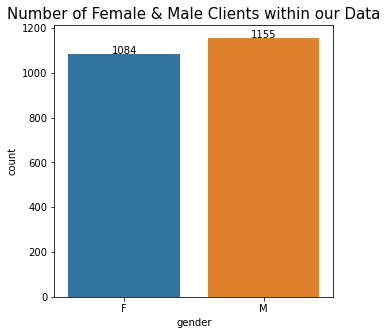

In [47]:
# How many male & female clients within our data?

fig, ax = plt.subplots(figsize = (5,5))
ax = sns.countplot(x="gender", data = base)
plt.title('Number of Female & Male Clients within our Data', fontsize = 15)


show_values_on_bars(ax)

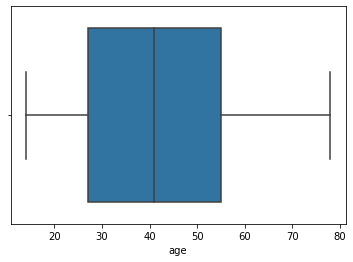

In [48]:
#Boxplot Age 

base.groupby(['client_id'])
base

ax = sns.boxplot(x="age", data=base)

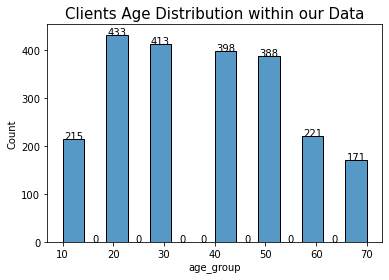

In [49]:
# Client Age Distribution

base.groupby(['client_id'])

ax = sns.histplot(data = base, x="age_group",  palette ='viridis')

plt.title('Clients Age Distribution within our Data', fontsize = 15)

show_values_on_bars(ax)

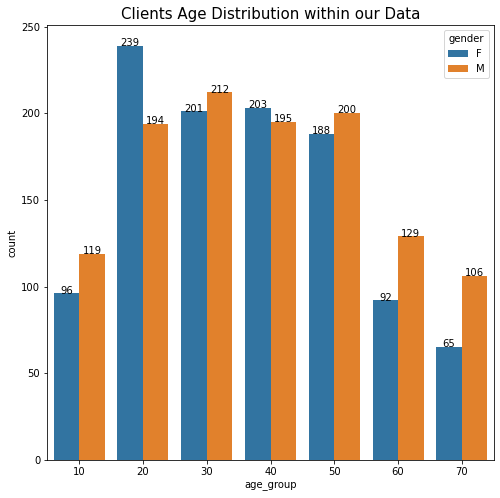

In [50]:
# What is the age group distribution within our data?

fig, ax = plt.subplots(figsize = (8,8))
ax = sns.countplot(x="age_group", hue = 'gender', data = base)
plt.title('Clients Age Distribution within our Data', fontsize = 15)

show_values_on_bars(ax)

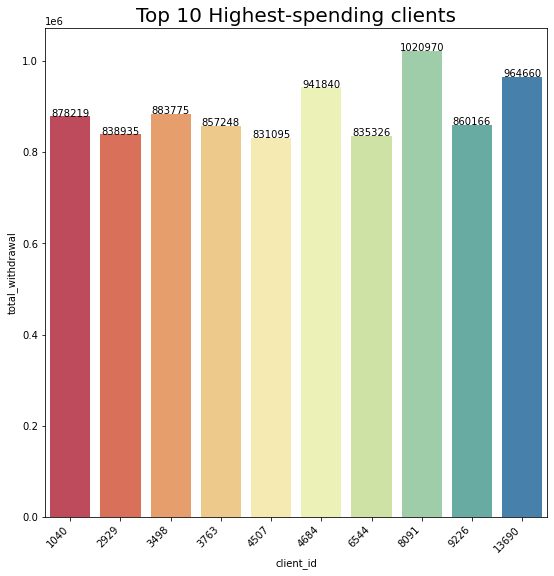

In [51]:
# Top 10 Highest-spending clients

fig, ax = plt.subplots(figsize = (9,9))

cls = base.sort_values('total_withdrawal', ascending = False)
cls = cls.head(10)


ax = sns.barplot(x="client_id", y= "total_withdrawal", data = cls, palette ="Spectral", ci = None) 

plt.title('Top 10 Highest-spending clients', fontsize = 20)
plt.xticks(rotation=45, ha='right')

show_values_on_bars(ax)

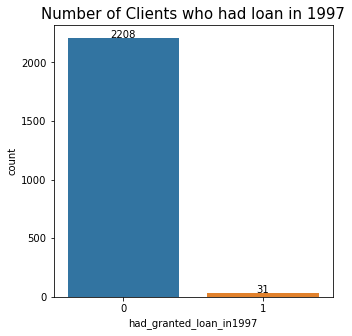

In [52]:
# Clients Who had loan in 1997

fig, ax = plt.subplots(figsize = (5,5))
ax = sns.countplot(x='had_granted_loan_in1997', data = base)
plt.title('Number of Clients who had loan in 1997', fontsize = 15)

show_values_on_bars(ax)

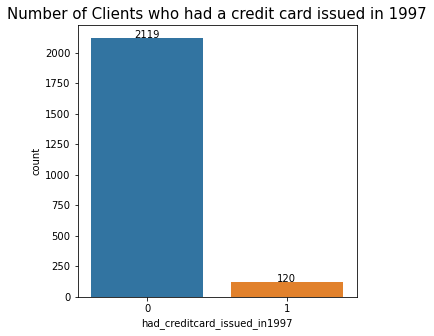

In [53]:
# How many male & female clients within our data?

fig, ax = plt.subplots(figsize = (5,5))
ax = sns.countplot(x='had_creditcard_issued_in1997', data = base)
plt.title('Number of Clients who had a credit card issued in 1997', fontsize = 15)

show_values_on_bars(ax)

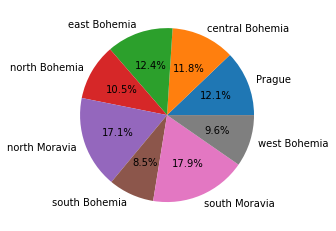

,client_id
client_region,
Prague,272
central Bohemia,265
east Bohemia,277
north Bohemia,235
north Moravia,383
south Bohemia,190
south Moravia,401
west Bohemia,216


In [54]:
#Client per each Region
clr=base.groupby('client_region')['client_id'].count()
plt.pie(clr, labels=clr.index, autopct='%1.1f%%')
plt.show()

pd.DataFrame(clr)

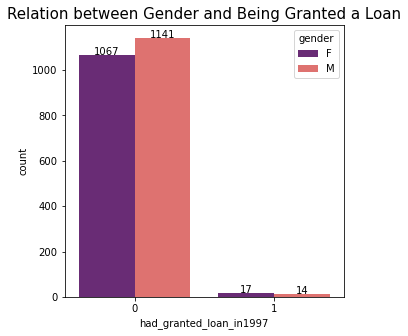

In [55]:
# Is there a relation between gender and being granted a loan?

fig, ax = plt.subplots(figsize = (5,5))
ax = sns.countplot(x="had_granted_loan_in1997", hue = 'gender', data = base, palette = 'magma')
plt.title('Relation between Gender and Being Granted a Loan', fontsize = 15)

show_values_on_bars(ax)

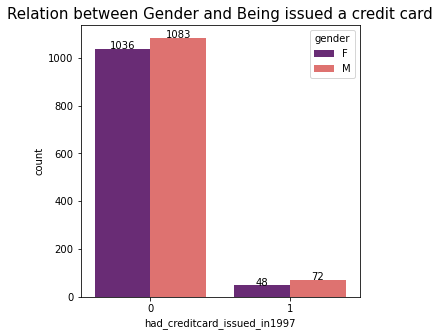

In [56]:
# Is there a relation between gender and being issued a credit card?

fig, ax = plt.subplots(figsize = (5,5))
ax = sns.countplot(x="had_creditcard_issued_in1997", hue = 'gender', data = base, palette = 'magma')
plt.title('Relation between Gender and Being issued a credit card', fontsize = 15)

show_values_on_bars(ax)

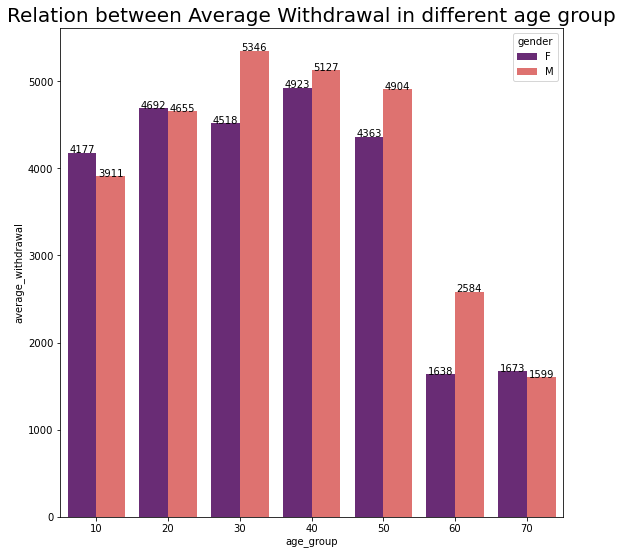

In [57]:
# Which Age group has the highest average withdrawal?

fig, ax = plt.subplots(figsize = (9,9))
ax = sns.barplot(x="age_group", y= "average_withdrawal", hue = "gender", data = base, palette ='magma', ci = None)

plt.title('Relation between Average Withdrawal in different age group', fontsize = 20)

show_values_on_bars(ax)

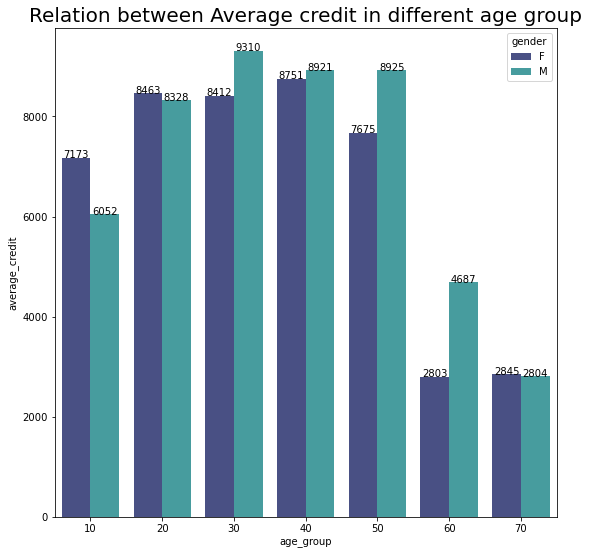

In [58]:
# Which Age group has the highest average credit?

fig, ax = plt.subplots(figsize = (9,9))
ax = sns.barplot(x="age_group", y= "average_credit", hue = "gender", data = base, palette ='mako', ci = None)

plt.title('Relation between Average credit in different age group', fontsize = 20)

show_values_on_bars(ax)

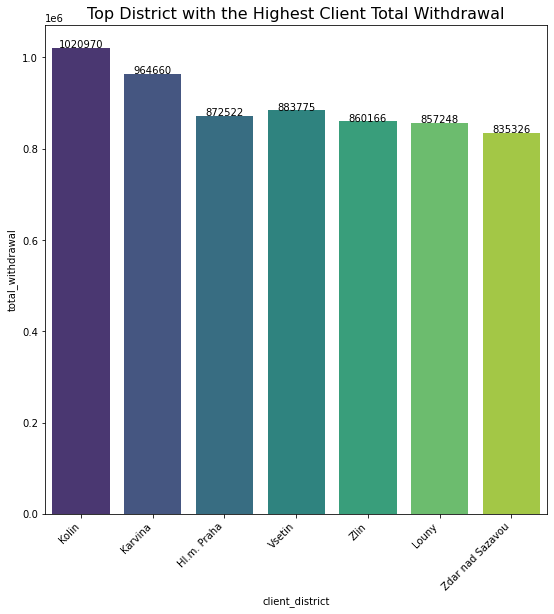

In [85]:
# District with the highest total withdrawal

fig, ax = plt.subplots(figsize = (9,9))

df = base.sort_values('total_withdrawal', ascending = False)
df = df.head(10)


ax = sns.barplot(x="client_district", y= "total_withdrawal", data = df, palette ='viridis', ci = None)

plt.title('Top District with the Highest Client Total Withdrawal', fontsize = 16)
plt.xticks(rotation=45, ha='right')

show_values_on_bars(ax)

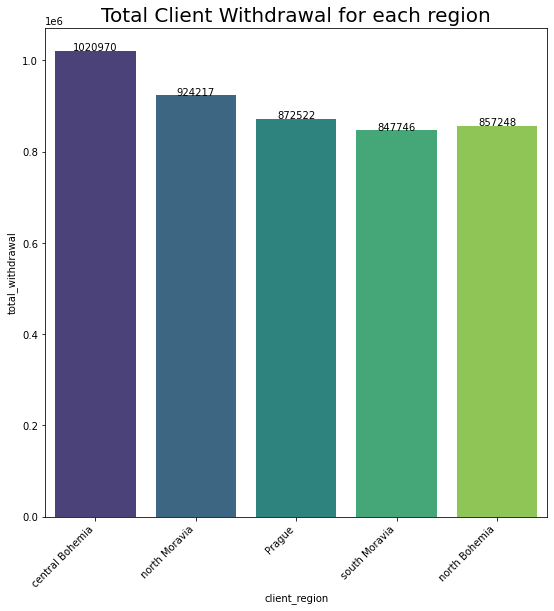

In [79]:
# Region with the highest total withdrawal

fig, ax = plt.subplots(figsize = (9,9))

df = base.sort_values('total_withdrawal', ascending = False)
df = df.head(10)


ax = sns.barplot(x="client_region", y= "total_withdrawal", data = df, palette ='viridis', ci = None)

plt.title('Total Client Withdrawal for each region', fontsize = 20)
plt.xticks(rotation=45, ha='right')

show_values_on_bars(ax)

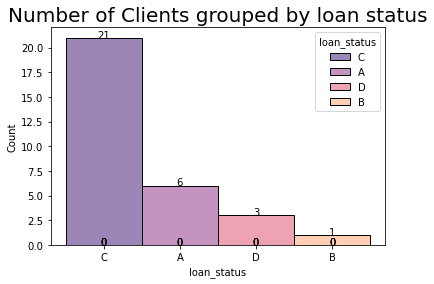

In [61]:
# Loan Status within clients who has a loan

df = base[base.loan_status != 0]

ax = sns.histplot(x="loan_status", data = df, hue = "loan_status", palette ='magma')

plt.title('Number of Clients grouped by loan status', fontsize = 20)

show_values_on_bars(ax)

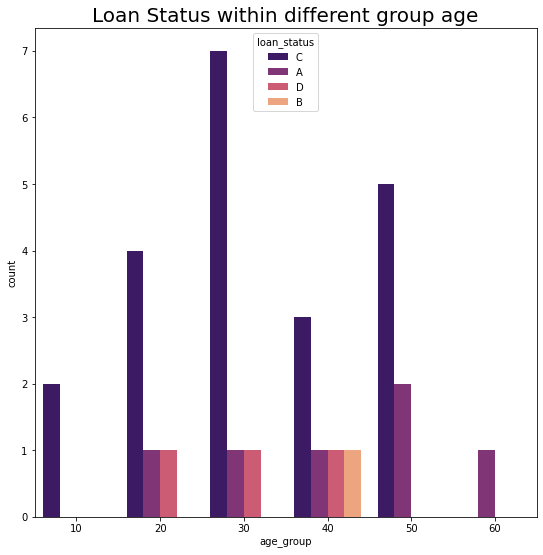

In [62]:
# Loan Status within Age distribution

df = base[base.loan_status != 0]

fig, ax = plt.subplots(figsize = (9,9))

ax = sns.countplot(x="age_group",  data = df, hue = "loan_status", palette ='magma')

plt.title('Loan Status within different group age', fontsize = 20)

plt.show()
#show_values_on_bars(ax)

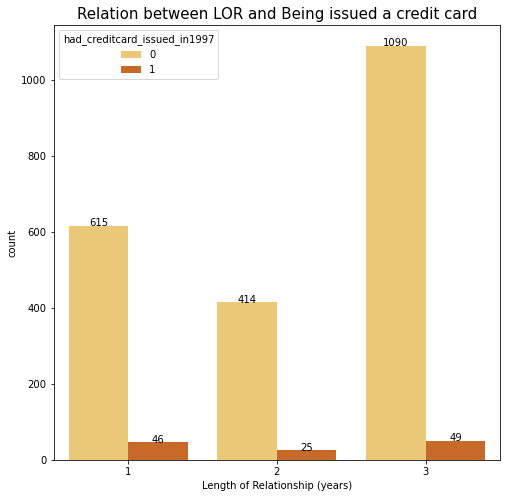

In [63]:
#Relationship between LOR nd being issued a Credit card
fig, ax = plt.subplots(figsize = (8,8))
ax = sns.countplot(x="lor", hue = 'had_creditcard_issued_in1997', data = base, palette = "YlOrBr")
ax.set_xlabel('Length of Relationship (years)')
plt.title('Relation between LOR and Being issued a credit card', fontsize = 15)

show_values_on_bars(ax)

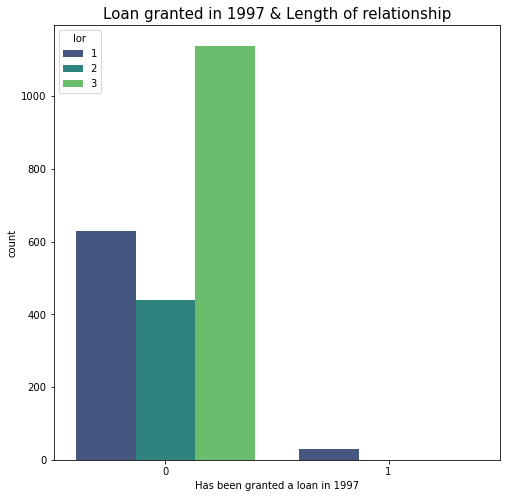

In [64]:
# LOR and loan

fig, ax = plt.subplots(figsize = (8,8))
ax = sns.countplot(x="had_granted_loan_in1997", hue = 'lor', data = base, palette = 'viridis')
ax.set_xlabel('Has been granted a loan in 1997')
plt.title('Loan granted in 1997 & Length of relationship', fontsize = 15)

#show_values_on_bars(ax)
plt.show()

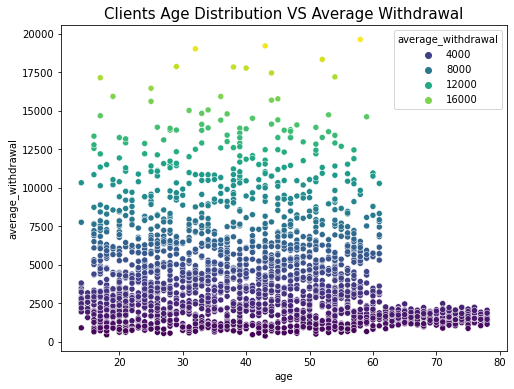

In [65]:
# Age group vs Avg withdrawal

base.groupby(['client_id'])
base

fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(data=base, x="age", y="average_withdrawal",hue ='average_withdrawal',palette = 'viridis')

plt.title('Clients Age Distribution VS Average Withdrawal', fontsize = 15)

plt.show()

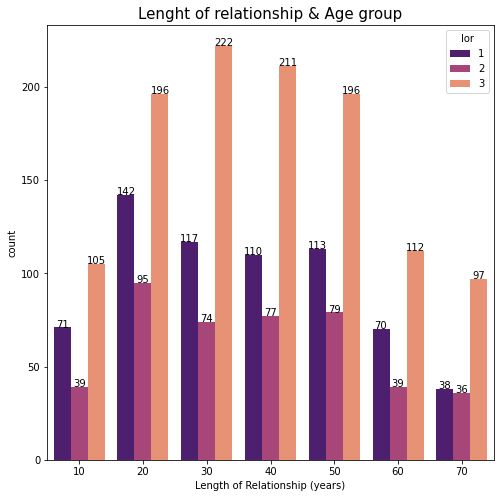

In [66]:
# LOR within different age groups

fig, ax = plt.subplots(figsize = (8,8))
ax = sns.countplot(x="age_group", hue = 'lor', data = base, palette = 'magma')
ax.set_xlabel('Length of Relationship (years)')
plt.title('Lenght of relationship & Age group', fontsize = 15)

show_values_on_bars(ax)

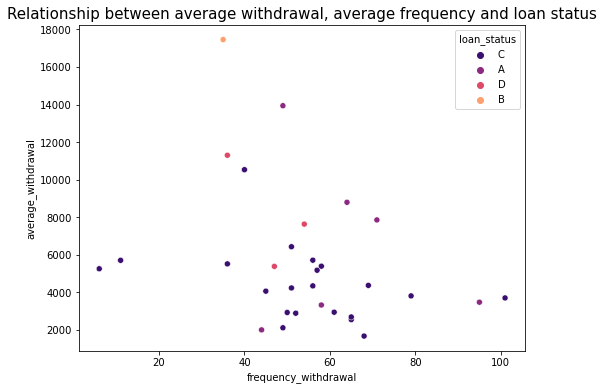

In [67]:
# Relationship between average withdrawal, average frequency and loan status

df = base[base.loan_status != 0]
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(data=df, x="frequency_withdrawal", y="average_withdrawal",hue ='loan_status',palette = 'magma')
plt.title('Relationship between average withdrawal, average frequency and loan status', fontsize = 15)
plt.show()

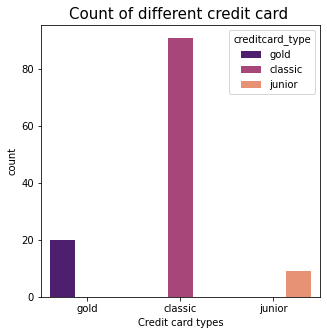

In [68]:
# credit card types

df = base.groupby(['client_id'])
df = base[base.had_creditcard_issued_in1997 != 0]


fig, ax = plt.subplots(figsize = (5,5))
ax = sns.countplot(x="creditcard_type", hue = 'creditcard_type', data = df, palette = 'magma')
ax.set_xlabel('Credit card types')
plt.title('Count of different credit card ', fontsize = 15)

plt.show()

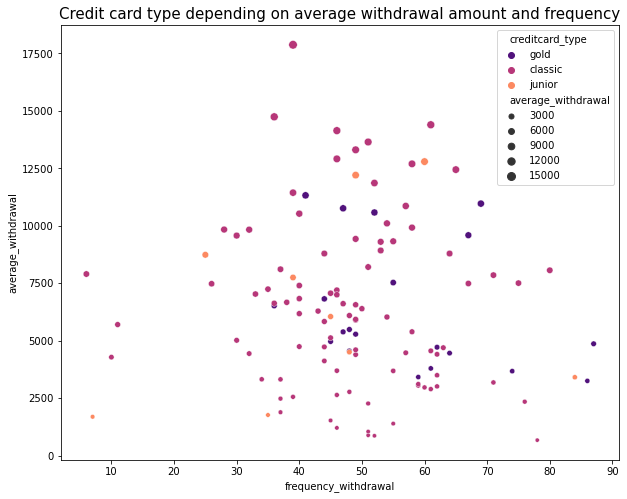

In [69]:
#Credit card types and average withdrawal

df = base.groupby(['client_id'])
df = base[base.had_creditcard_issued_in1997 != 0]

fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(data=df, x="frequency_withdrawal", y="average_withdrawal",hue ='creditcard_type',palette = 'magma',size="average_withdrawal")
plt.title('Credit card type depending on average withdrawal amount and frequency', fontsize = 15)
plt.show()


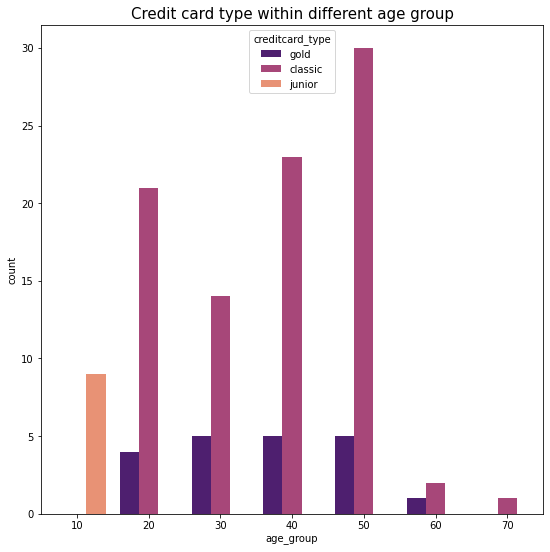

In [70]:
# Credit card type within different age group

df = base.groupby(['client_id'])
df = base[base.had_creditcard_issued_in1997 != 0]

fig, ax = plt.subplots(figsize = (9,9))

ax = sns.countplot(x="age_group",  data = df, hue = "creditcard_type", palette ='magma')

plt.title('Credit card type within different age group', fontsize = 15)

plt.show()

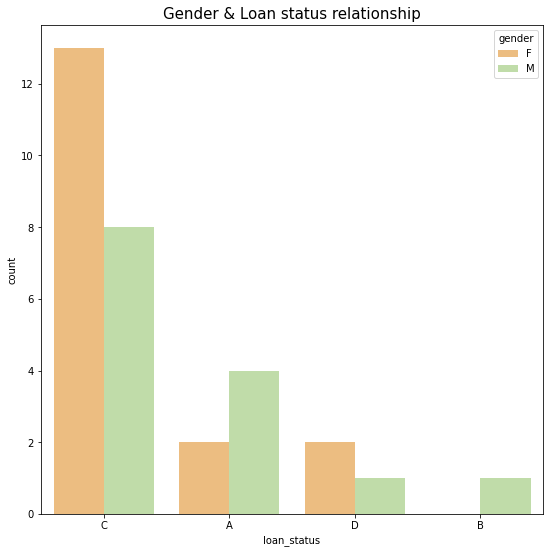

In [71]:
# Gender and loan status

df = base[base.loan_status != 0]

fig, ax = plt.subplots(figsize = (9,9))

ax = sns.countplot(x="loan_status",  data = df, hue = "gender", palette ='Spectral')

plt.title('Gender & Loan status relationship', fontsize = 15)

plt.show()

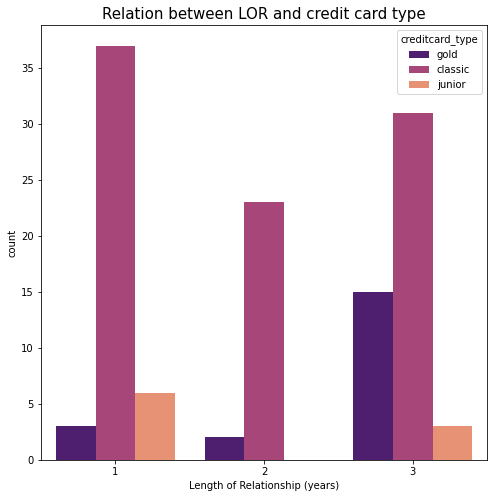

In [72]:
# LOR and credit card type

df = base.groupby(['client_id'])
df = base[base.had_creditcard_issued_in1997 != 0]

fig, ax = plt.subplots(figsize = (8,8))
ax = sns.countplot(x="lor", hue = 'creditcard_type', data = df, palette = 'magma')
ax.set_xlabel('Length of Relationship (years)')
plt.title('Relation between LOR and credit card type', fontsize = 15)

plt.show()